# Limpieza de datos

Realice las operaciones y describa lo que va encontrando

In [2]:
# Importar librerías
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


## 1. Vista rápida al dataset


In [4]:
# Cargar el dataset
df_videojuegos = pd.read_csv("dataset_videojuegos.csv")
df_videojuegos

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [5]:
# Revisamos las columnas y sus tipos de datos
df_videojuegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


## 2. Datos duplicados

In [7]:
# Identificar las filas duplicadas
duplicadas = df_videojuegos.duplicated().sum()
duplicadas

0

## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [9]:
df_videojuegos.isnull().sum().sort_values(ascending=False)

summary         114
name              0
platform          0
release_date      0
meta_score        0
user_review       0
dtype: int64

In [10]:
# A muchos videojuegos les falta el 'summary' o resumen, sin embargo para la proporción de datos habrá que ver si representan un gran porcentaje
# La cantidad de datos faltantes y el porcentaje por la columna
porcentaje = (df_videojuegos['summary'].isnull().sum() / len(df_videojuegos['summary'])) * 100
print(f"Filas faltantes en summary: {df_videojuegos['summary'].isnull().sum()}. Representan un porcentaje del: {porcentaje:.2f}%")

Filas faltantes en summary: 114. Representan un porcentaje del: 0.61%


In [11]:
# Podemos ver que no representan ni el 1% de los datos, por lo que sería prudente eliminarlos
# Eliminar las filas en donde hace falta el dato en la columna summary
df_videojuegos.dropna(subset = 'summary', inplace=True)


In [12]:
print(f"Filas faltantes en summary: {df_videojuegos['summary'].isnull().sum()}")

Filas faltantes en summary: 0


## 4. Verifique outlaiers de cada fila

In [14]:
# Podemos observar que la 'user_review' está definida como un dato categorico y no podemos gráficarlo 
# por lo que los gráficaremos conviertiendola a enteros
df_user_review = pd.to_numeric(
    df_videojuegos['user_review'].replace('tbd', None)
)
df_user_review.isnull().sum()

# No vamos a eliminar tdb (To be determinate) porque ciertamente es mejor tenerlo así que tener un valor númerico, porque si lo reducimos
# a otro valor numerico como 0 afectaría negativamente en la confiabilidad de los datos, es decir cambiaría por ejemplo datos como promedios de notas de juegos

1345

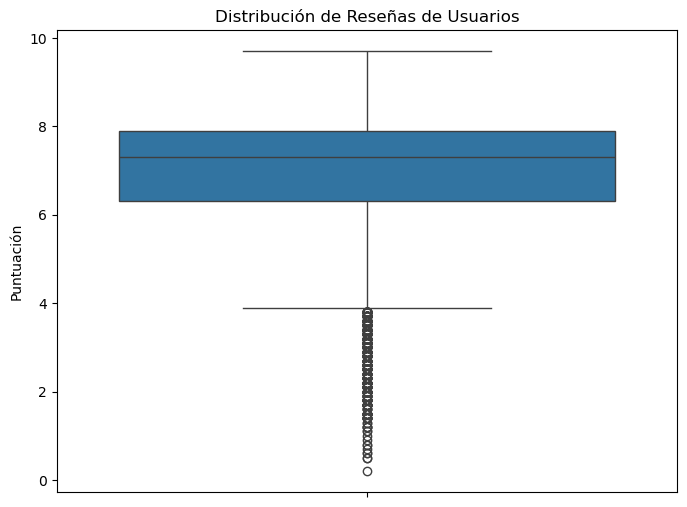

In [15]:
# Guardamos en un dataframe diferente para no modificar el original
df_graficar = df_videojuegos
df_graficar['user_review'] = pd.to_numeric(
    df_graficar['user_review'].replace('tbd', None)
)

# Ahora gráficamos sin tener en cuenta los datos núlos, guardandolos en un Dataframe diferente

# Filtrar los valores nulos
df_filtrado = df_graficar.dropna(subset=['user_review'])

# Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtrado['user_review'])
plt.title("Distribución de Reseñas de Usuarios")
plt.ylabel("Puntuación")
plt.show()

In [16]:
# No hay ningiuna reseña que salga de los límites entre 0 y 10, además los datos parecen estár distribuidos de manera uniforme
# Si quisieramos podríamos revertir los cambios con:
# df_videojuegos['user_review'] = df_videojuegos['user_review'].astype(str).replace('nan', 'tbd')

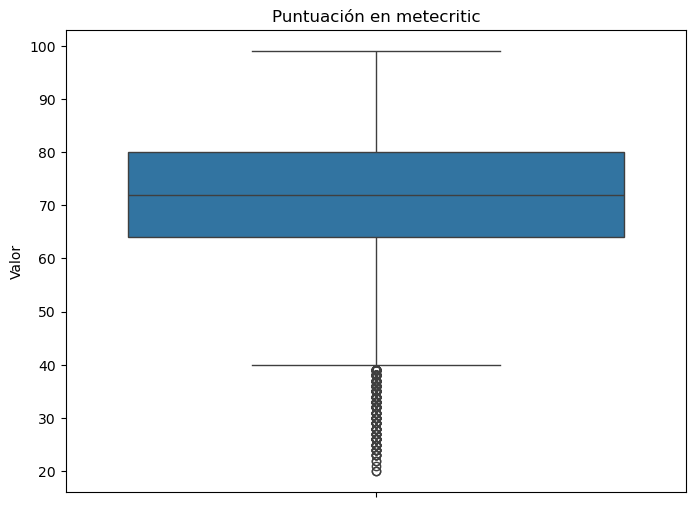

In [17]:
# Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_videojuegos['meta_score'])
plt.title("Puntuación en metecritic")
plt.ylabel("Valor")
plt.show()

In [18]:
# Igualmente podemos observar que las puntuaciones son uniformes

## 4.1 Datos numéricos

In [20]:
df_videojuegos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18686 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18686 non-null  object 
 1   platform      18686 non-null  object 
 2   release_date  18686 non-null  object 
 3   summary       18686 non-null  object 
 4   meta_score    18686 non-null  int64  
 5   user_review   17341 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1021.9+ KB


In [21]:
print (df_videojuegos.select_dtypes(include=['int64']).columns)
print (df_videojuegos.select_dtypes(include=['float64']).columns)

Index(['meta_score'], dtype='object')
Index(['user_review'], dtype='object')


In [22]:
# Podemos observar que la 'user_review' tiene varios valores nulos, así que rellenarémos los nulos con la moda

# Valores nulos con 'user_review'
print("Valores faltantes en la columna 'user_review'", df_videojuegos['user_review'].isnull().sum())

# Mostrar los nulos
df_videojuegos[df_videojuegos['user_review'].isnull()]

# Calcular la moda
moda = df_videojuegos['user_review'].mode()[0]  # Tomamos el primer valor si hay múltiples modas

print(moda)



Valores faltantes en la columna 'user_review' 1345
7.7


In [23]:
print("Valores faltantes en la columna 'user_review'", df_videojuegos['user_review'].isnull().sum())

Valores faltantes en la columna 'user_review' 1345


## 4.2 Datos categóricos

In [25]:
df_videojuegos

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [26]:
# Identificar las columnas categoricas
df_videojuegos.select_dtypes(include=['object']).columns

Index(['name', 'platform', 'release_date', 'summary'], dtype='object')

In [27]:
# Eliminar espacios al inicio y al final de las columnas categoricas
df_videojuegos['name'] = df_videojuegos['name'].str.strip()
df_videojuegos['platform'] = df_videojuegos['platform'].str.strip()
df_videojuegos['release_date'] = df_videojuegos['release_date'].str.strip()
df_videojuegos['summary'] = df_videojuegos['summary'].str.strip()

# Verificar los cambios
print(df_videojuegos[['name', 'platform', 'release_date', 'summary']].head())


                                   name       platform        release_date  \
0  The Legend of Zelda: Ocarina of Time    Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2    PlayStation  September 20, 2000   
2                   Grand Theft Auto IV  PlayStation 3      April 29, 2008   
3                           SoulCalibur      Dreamcast   September 8, 1999   
4                   Grand Theft Auto IV       Xbox 360      April 29, 2008   

                                             summary  
0  As a young boy, Link is tricked by Ganondorf, ...  
1  As most major publishers' development efforts ...  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...  
3  This is a tale of souls and swords, transcendi...  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...  


C:\Users\pablo\AppData\Local\Temp\ipykernel_7440\3474724295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


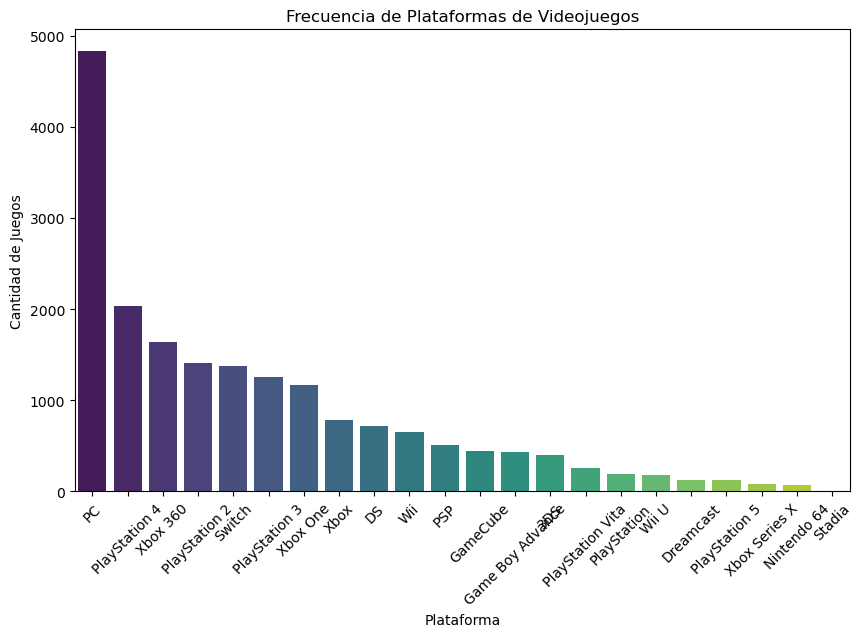

In [48]:
# Podemos graficar las 
# Obtener las frecuencias de las plataformas
platform_counts = df_videojuegos['platform'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')

# Personalización del gráfico
plt.title('Frecuencia de Plataformas de Videojuegos')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Podemos ver que google stadia tiene apenas registros y la plataforma cerró sus servidores hace un par de años,
# por lo que podemos eliminar estos registros
# Eliminar los registros donde la plataforma sea 'Stadia'
df_videojuegos = df_videojuegos[df_videojuegos['platform'] != 'Stadia']

# Verificar los cambios
print(df_videojuegos['platform'].value_counts())

platform
PC                  4829
PlayStation 4       2039
Xbox 360            1640
PlayStation 2       1412
Switch              1375
PlayStation 3       1255
Xbox One            1166
Xbox                 789
DS                   718
Wii                  654
PSP                  509
GameCube             448
Game Boy Advance     433
3DS                  394
PlayStation Vita     254
PlayStation          186
Wii U                183
Dreamcast            125
PlayStation 5        124
Xbox Series X         77
Nintendo 64           71
Name: count, dtype: int64
